<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/Keras/CatsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras import layers
from keras import models

In [3]:
model = models.Sequential([
    layers.Conv2D(
        32, (3, 3), activation="relu",
        input_shape=(150, 150, 3), name='CONV1'
    ),
    layers.MaxPooling2D((2, 2), name='POOL1'),

    layers.Conv2D(64, (3, 3), activation="relu", name='CONV2'),
    layers.MaxPooling2D((2, 2), name='POOL2'),

    layers.Conv2D(128, (3, 3), activation="relu", name='CONV3'),
    layers.MaxPooling2D((2, 2), name='POOL3'),

    layers.Conv2D(128, (3, 3), activation="relu", name='CONV4'),
    layers.MaxPooling2D((2, 2), name='POOL4'),

    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(512, activation="relu", name='FC1'),

    layers.Dense(1, activation="sigmoid", name='Prediction')
])

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CONV1 (Conv2D)              (None, 148, 148, 32)      896       
                                                                 
 POOL1 (MaxPooling2D)        (None, 74, 74, 32)        0         
                                                                 
 CONV2 (Conv2D)              (None, 72, 72, 64)        18496     
                                                                 
 POOL2 (MaxPooling2D)        (None, 36, 36, 64)        0         
                                                                 
 CONV3 (Conv2D)              (None, 34, 34, 128)       73856     
                                                                 
 POOL3 (MaxPooling2D)        (None, 17, 17, 128)       0         
                                                                 
 CONV4 (Conv2D)              (None, 15, 15, 128)       1

In [5]:
train_dir = "/content/drive/MyDrive/Data Science/DogsCatsKaggle/prepared_train_data/train"
validation_dir = "/content/drive/MyDrive/Data Science/DogsCatsKaggle/prepared_train_data/validation"

In [6]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
res = next(train_generator)

In [8]:
res[0].shape

(20, 150, 150, 3)

In [9]:
res[1]

array([0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1.], dtype=float32)

In [10]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1131361688550500263
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14391508992
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14231934823179019492
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [11]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
50/50 [==============================] - 100s 2s/step - loss: 0.7188 - accuracy: 0.5340 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 2/30
50/50 [==============================] - 10s 197ms/step - loss: 0.6956 - accuracy: 0.4970 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 3/30
50/50 [==============================] - 9s 190ms/step - loss: 0.7018 - accuracy: 0.5100 - val_loss: 0.6878 - val_accuracy: 0.5080
Epoch 4/30
50/50 [==============================] - 9s 172ms/step - loss: 0.6931 - accuracy: 0.5630 - val_loss: 0.6697 - val_accuracy: 0.6430
Epoch 5/30
50/50 [==============================] - 9s 178ms/step - loss: 0.6802 - accuracy: 0.5860 - val_loss: 0.6659 - val_accuracy: 0.5660
Epoch 6/30
50/50 [==============================] - 9s 190ms/step - loss: 0.6716 - accuracy: 0.6290 - val_loss: 0.6095 - val_accuracy: 0.6570
Epoch 7/30
50/50 [==============================] - 10s 202ms/step - loss: 0.5927 - accuracy: 0.6830 - val_loss: 0.7010 - val_accuracy: 0.6230
Epoch

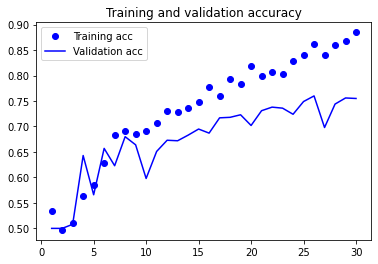

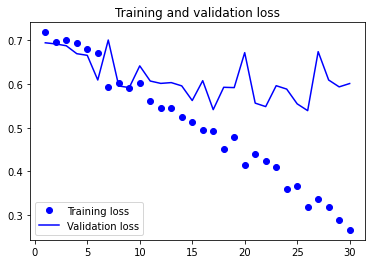

In [13]:
import matplotlib.pyplot as plt


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

# Расширение данных

In [15]:
from keras_preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [ ]:
import os

import matplotlib.pyplot as plt

from more_itertools import take
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_cats_dir = "prepared_train_data/train/cats"

fnames = [
    os.path.join(train_cats_dir, fname)
    for fname in os.listdir(train_cats_dir)
]

img_path = fnames[92]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

for batch in take(4, datagen.flow(x, batch_size=1)):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))

plt.show()

In [ ]:
from keras import layers
from keras import models


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["acc"]
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

In [ ]:
import matplotlib.pyplot as plt


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()